In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Getting the sms data
sms = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Let's see the columns:
sms.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
# Lets remove the unwanted columns:
sms.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis = 1,inplace=True)

In [6]:
# Lets change the v1 and v2 column into something meaningful
# v1 can be renamed as label and v2 can be renamed message

sms.columns = ['label','message']

# lets check the first five rows
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Lets see if there is any null value 
sms.isnull().sum()

label      0
message    0
dtype: int64

There are no null values present in the data

In [8]:
# Lets see if there are any blank message i.e empty string as message
empty = []

for i,label,msg in sms.itertuples():
    if type(sms)==str:
        if sms.isspace():
            empty.append(i)

print(f"There are {len(empty)} empty string as message")

There are 0 empty string as message


ham     4825
spam     747
Name: label, dtype: int64




<AxesSubplot:xlabel='label', ylabel='count'>

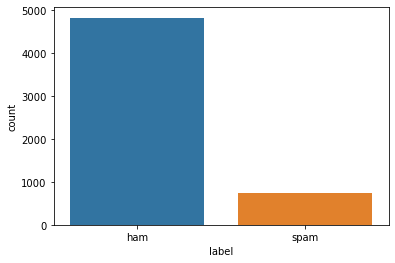

In [9]:
# Number of ham and spam messages:
print(sms['label'].value_counts())
print('\n')
sns.countplot(x='label',data=sms)

**Lets check the length of each message and see if using length we can diffrentiate between ham and spam**

In [10]:
# we will create a new column called : length
sms['length'] = sms['message'].apply(len)

# First five rows:
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


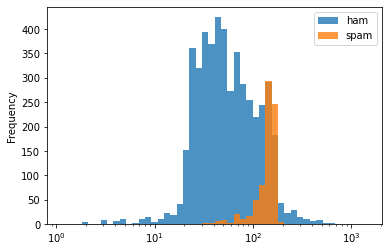

In [11]:
# Lets plot the length of the message

plt.xscale('log')
bins= 1.16**np.arange(1,50)

sms[sms['label']=='ham']['length'].plot(kind='hist',bins=bins,alpha=0.8)
sms[sms['label']=='spam']['length'].plot(kind='hist',bins=bins,alpha=0.8)

plt.legend(['ham','spam'])

**Clearly, spam messges are longer in length as compared to ham messages**

# Data Cleaning

**Punctuation**

In [12]:
# Let's remove the punctuation
import string

# Function to remove the punctuation
def remove_punct(text):
    new_text = ''
    for char in text:
        if char in string.punctuation:
            continue
        else:
            new_text += char
    return new_text


# applying the above function on single message to check if it works
single_message = sms['message'][0]

print('message before removing the punctuation:')
print('\n')
print(single_message)
print('\n')
print('message after removing the punctuation:')
print()
print(remove_punct(single_message))

message before removing the punctuation:


Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


message after removing the punctuation:

Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat


In [13]:
# Let's apply the above function to all the messages
sms['message'] = sms['message'].apply(remove_punct)

**Stemming**

In [14]:
# To perform stemming we will use Porterstemmer from nltk
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()

# Function to do the stemming
def stemming(text):
    text = text.split(' ') # to seperate the words
    text = [p_stemmer.stem(word) for word in text]
    
    return text
    
# Lets test it on single message
single_message = sms['message'][4]

print('message before stemming:')
print('\n')
print(single_message)
print('\n')
print('message after stemming:')
print()
print(stemming(single_message))

message before stemming:


Nah I dont think he goes to usf he lives around here though


message after stemming:

['nah', 'I', 'dont', 'think', 'he', 'goe', 'to', 'usf', 'he', 'live', 'around', 'here', 'though']


Check how 'goes' became 'goe' and 'lives' became 'live'. We will keep the message in the form of list for sometime. We will convert it back to text for creating the model

In [15]:
# Let's apply the above function to all the messages
sms['message'] = sms['message'].apply(stemming)

**Stopwords**

In [16]:
# Stopwords can be is,are,the etc.
# We will use stopword method from nltk corpus library
from nltk.corpus import stopwords

# function to remove the stopword
def remove_stopwords(text):
    text = [word for word in text if word not in stopwords.words('english')]
    
    # converting the list back to text
    return ' '.join(text)

# Let's test it on single message
single_message = sms['message'][4]

print('message before removing the stopwords:')
print('\n')
print(single_message)
print('\n')
print('message after removing the stopwords:')
print()
print(remove_stopwords(single_message))

message before removing the stopwords:


['nah', 'I', 'dont', 'think', 'he', 'goe', 'to', 'usf', 'he', 'live', 'around', 'here', 'though']


message after removing the stopwords:

nah I dont think goe usf live around though


**'he','here','to' are removed from the message.**

In [17]:
# Let's apply the above function to all the messages
sms['message'] = sms['message'].apply(remove_stopwords)

**Let's create a model.We will use navie_bayes,LinearSVC,logisticRegression to create and train our model and then compare the scores**

In [18]:
# Libraries needed
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

**The TfidfVectorizer function create a sparse matrix of words and it's frequency. It then calculates the tf-idf features from this matrix.**

In [19]:
# Let's divide the data into X and y

X = sms['message']
y = sms['label']

# Let's perform the one hot encoding for y 
encoded_y = pd.get_dummies(y,drop_first=True).values.reshape(-1,)

**if y = 1 it is a spam message and if y = 0 it is a ham message**

In [20]:
# Let's divide the data into train and test set. We will take 25% of data as test set
X_train,X_test,y_train,y_test = train_test_split(X,encoded_y,test_size=0.25)

**Logistic Regression**

In [21]:
logistic = Pipeline([
    ('vector',TfidfVectorizer()),
    ('classifier',LogisticRegression())
])

logistic.fit(X_train,y_train)

Pipeline(steps=[('vector', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [22]:
predict_log = logistic.predict(X_test)

Evaluation of Logistic Regression model

Accuracy of log model is 96.05%


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1201
           1       0.94      0.76      0.84       192

    accuracy                           0.96      1393
   macro avg       0.95      0.88      0.91      1393
weighted avg       0.96      0.96      0.96      1393





[Text(0, 0.5, 'ham'), Text(0, 1.5, 'spam')]

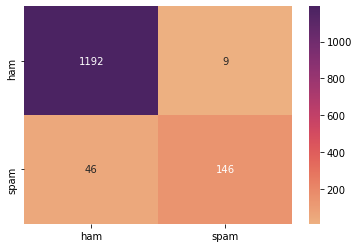

In [23]:
acc_log = accuracy_score(y_test,predict_log)
print(f"Accuracy of log model is {np.round(acc_log*100,2)}%")
print('\n')
print(classification_report(y_test,predict_log))
print('\n')

ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test,predict_log),annot = True,cmap='flare',fmt='g',ax=ax)

ax.xaxis.set_ticklabels(['ham', 'spam'])
ax.yaxis.set_ticklabels(['ham', 'spam'])

**Naive_Bayes**

In [24]:
naive = Pipeline([
    ('vector',TfidfVectorizer()),
    ('classifier',MultinomialNB())
])

naive.fit(X_train,y_train)

Pipeline(steps=[('vector', TfidfVectorizer()), ('classifier', MultinomialNB())])

In [25]:
predict_naive = naive.predict(X_test)

Evaluation of Naive_Bayes model

Accuracy of naive model is 96.05%


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1201
           1       1.00      0.79      0.88       192

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393





[Text(0, 0.5, 'ham'), Text(0, 1.5, 'spam')]

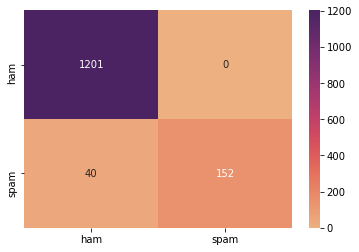

In [26]:
acc_naive = accuracy_score(y_test,predict_log)
print(f"Accuracy of naive model is {np.round(acc_naive*100,2)}%")
print('\n')
print(classification_report(y_test,predict_naive))
print('\n')

ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test,predict_naive),annot = True,cmap='flare',fmt='g',ax=ax)

ax.xaxis.set_ticklabels(['ham', 'spam'])
ax.yaxis.set_ticklabels(['ham', 'spam'])

**Linear SVC**

In [27]:
svc = Pipeline([
    ('vector',TfidfVectorizer()),
    ('classifier',LinearSVC())
])

svc.fit(X_train,y_train)

Pipeline(steps=[('vector', TfidfVectorizer()), ('classifier', LinearSVC())])

In [28]:
predict_svc = svc.predict(X_test)

Evaluation of LinearSVC model

Accuracy of svc model is 98.56%


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1201
           1       0.97      0.93      0.95       192

    accuracy                           0.99      1393
   macro avg       0.98      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393





[Text(0, 0.5, 'ham'), Text(0, 1.5, 'spam')]

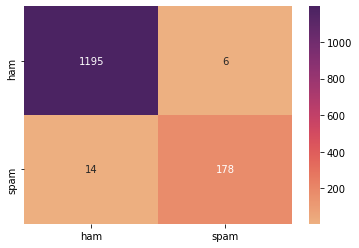

In [29]:
acc_svc = accuracy_score(y_test,predict_svc)
print(f"Accuracy of svc model is {np.round(acc_svc*100,2)}%")
print('\n')
print(classification_report(y_test,predict_svc))
print('\n')

ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test,predict_svc),annot = True,cmap='flare',fmt='g',ax=ax)

ax.xaxis.set_ticklabels(['ham', 'spam'])
ax.yaxis.set_ticklabels(['ham', 'spam'])

**Let's compare the accuracy of all three models**

(0.9, 1.0)

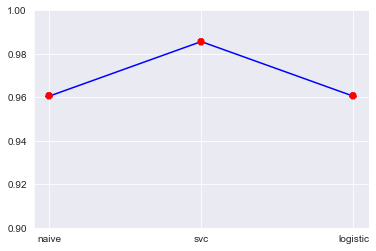

In [30]:
accuracy = {
    'naive':acc_naive,
    'svc':acc_svc,
    'logistic':acc_log
}

sns.set_style('darkgrid')
plt.plot(accuracy.keys(),accuracy.values(),color='blue',markeredgecolor='red',marker='*',markeredgewidth=4)
plt.ylim(0.9,1.0)

**As we can see in the above graph, Linear SVC model performed better then other models**

**Let's  check the Cross_Validation_Score for Linear SVC**

In [31]:
from sklearn.model_selection import cross_val_score

# svc is the Pipeline model we created above using LinearSVC
score = cross_val_score(svc,X,encoded_y,cv=15)

In [32]:
# Lets check the socre fro all 15 experiment
print(score)

[0.99193548 0.9811828  0.9811828  0.99193548 0.98387097 0.98387097
 0.98655914 0.98382749 0.98921833 0.98921833 0.98382749 0.97843666
 0.98382749 0.97843666 0.98113208]


In [33]:
# Lets check the average score
print(f"The average score is {np.round(score.mean()*100,2)}")

The average score is 98.46


In [34]:
# Lets save the linearsvc model for end to end deployment
import pickle

In [35]:
pickle.dump(svc,open('sms.pkl','wb'))

# Thank You